In [3]:
#Package Imports
import pandas as pd
pd.options.display.max_columns = None
import numpy as np

from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
%%time
#File Imports
props16 = pd.read_csv("Data/Zillow/properties_2016.csv")
props17 = pd.read_csv("Data/Zillow/properties_2017.csv")
train16 = pd.read_csv("Data/Zillow/train_2016_v2.csv", parse_dates= ['transactiondate'])
train17 = pd.read_csv("Data/Zillow/train_2017.csv", parse_dates= ['transactiondate'])

<timed exec>:2: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
<timed exec>:3: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 25.8 s


In [3]:
print("Number of properties: {}".format(len(props16)))
print("Number of columns: {}".format(len(props16.columns)-1))


Number of properties: 2985217
Number of columns: 57


In [12]:
props16.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [8]:
def null_percent(df):
    null_df= pd.DataFrame(columns = ["feature", "null_percentage"])
    for col in df.columns:
        null_df.loc[len(null_df), ['feature','null_percentage']] = col, df[col].isna().sum()/df.shape[0]
    return null_df.sort_values(by = "null_percentage", ascending = True)

In [5]:
null_percent(props16)

,feature,null_percentage
0,parcelid,0.0
17,fips,0.003831
33,propertylandusetypeid,0.003831
35,rawcensustractandblock,0.003831
37,regionidcounty,0.003831
25,longitude,0.003831
24,latitude,0.003831
52,assessmentyear,0.003832
5,bedroomcnt,0.003836
4,bathroomcnt,0.00384


In [6]:
null_percent(props17)

,feature,null_percentage
0,parcelid,0.0
17,fips,0.000982
33,propertylandusetypeid,0.000982
35,rawcensustractandblock,0.000982
37,regionidcounty,0.000982
25,longitude,0.000982
24,latitude,0.000982
52,assessmentyear,0.000983
5,bedroomcnt,0.000987
4,bathroomcnt,0.000991


Many columns in the property datasets are sparsely populated. These will have to be addressed before modeling. Many will likely be dropped, but value may be extracted from others with some massaging.

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64


<AxesSubplot:>

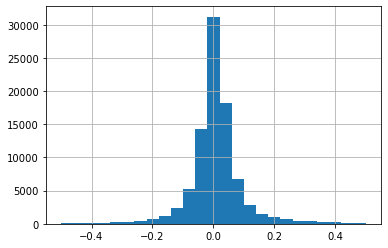

In [60]:
print(train16['logerror'].describe())
train16.loc[abs(train16['logerror']) < 0.5]['logerror'].hist(bins=25)

count    77613.000000
mean         0.016755
std          0.170887
min         -4.655420
25%         -0.024325
50%          0.006670
75%          0.039295
max          5.262999
Name: logerror, dtype: float64


<AxesSubplot:>

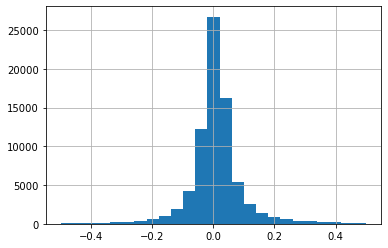

In [62]:
print(train17['logerror'].describe())
train17.loc[abs(train17['logerror']) < 0.5]['logerror'].hist(bins=25)

In [26]:
#Merge lat/long and region code date into the train set, filter out outlier values
train16_geo = train16.merge(props16[["parcelid", "latitude", "longitude", "fips", "regionidzip"]], on = "parcelid", how = 'left')
train16_geo = train16_geo.loc[abs(train16_geo['logerror']) < 0.5]

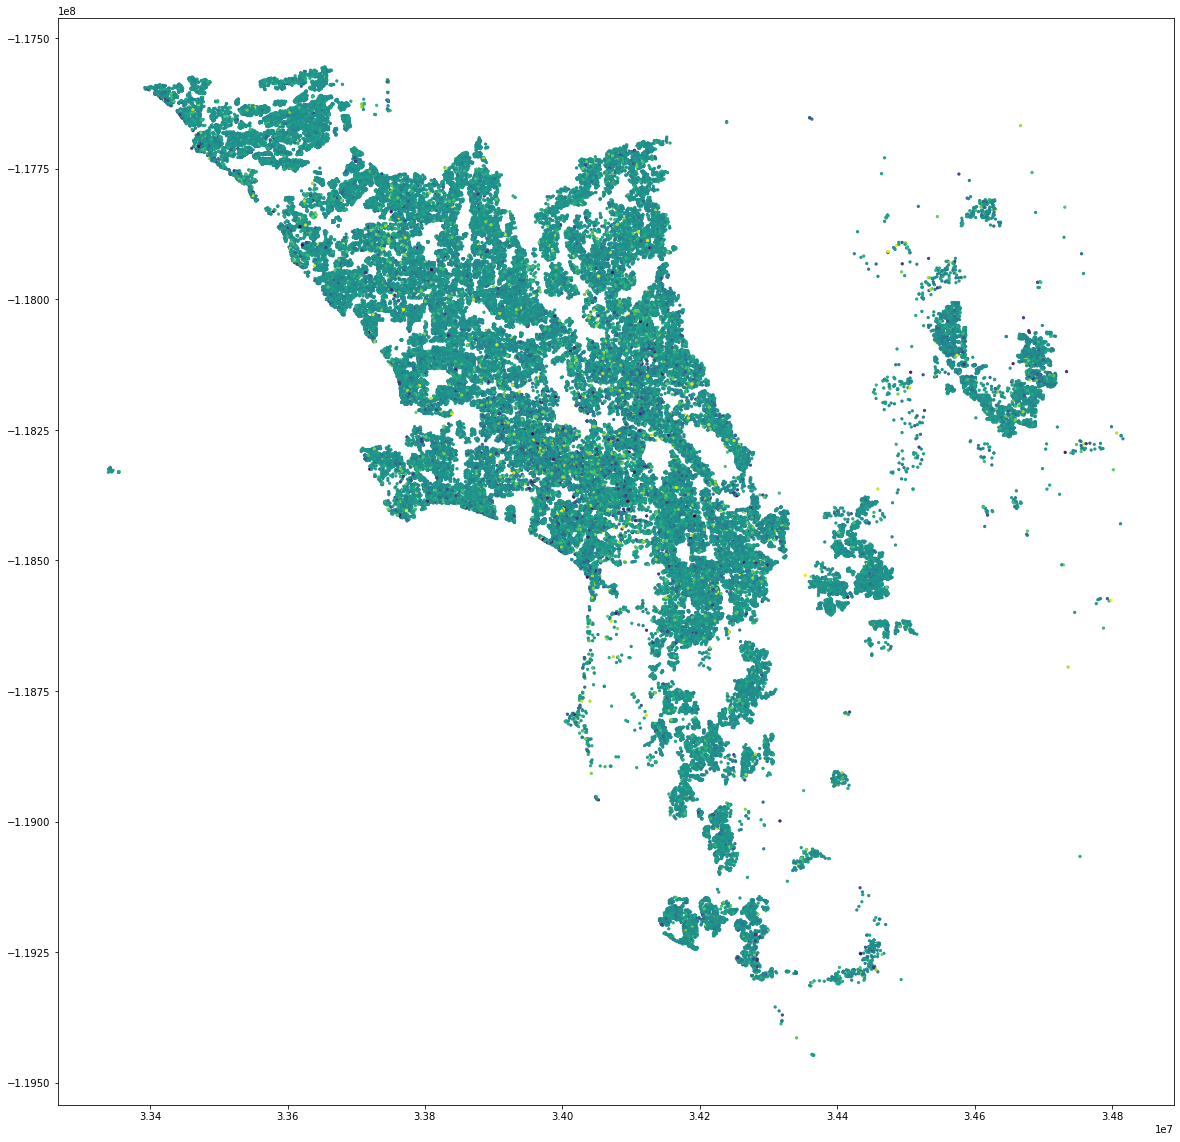

In [33]:
#Map the training data points color coded by logerror
plt.figure(figsize=(20,20))
plt.scatter(train16_geo.latitude, train16_geo.longitude, s=5, c = train16_geo.logerror, cmap = 'viridis')

The above map shows no strong geographic trend for logerror values. There may, however, be some local clustering.

In [18]:
#Identify the zip code with the most trainging data points
train16_geo.groupby("regionidzip").count().sort_values(by = 'fips', ascending = False)

,parcelid,logerror,transactiondate,latitude,longitude,fips
regionidzip,,,,,,
97319.0,912,912,912,912,912,912
96987.0,902,902,902,902,902,902
96974.0,824,824,824,824,824,824
97329.0,760,760,760,760,760,760
97318.0,726,726,726,726,726,726
...,...,...,...,...,...,...
96500.0,2,2,2,2,2,2
96226.0,1,1,1,1,1,1
97111.0,1,1,1,1,1,1


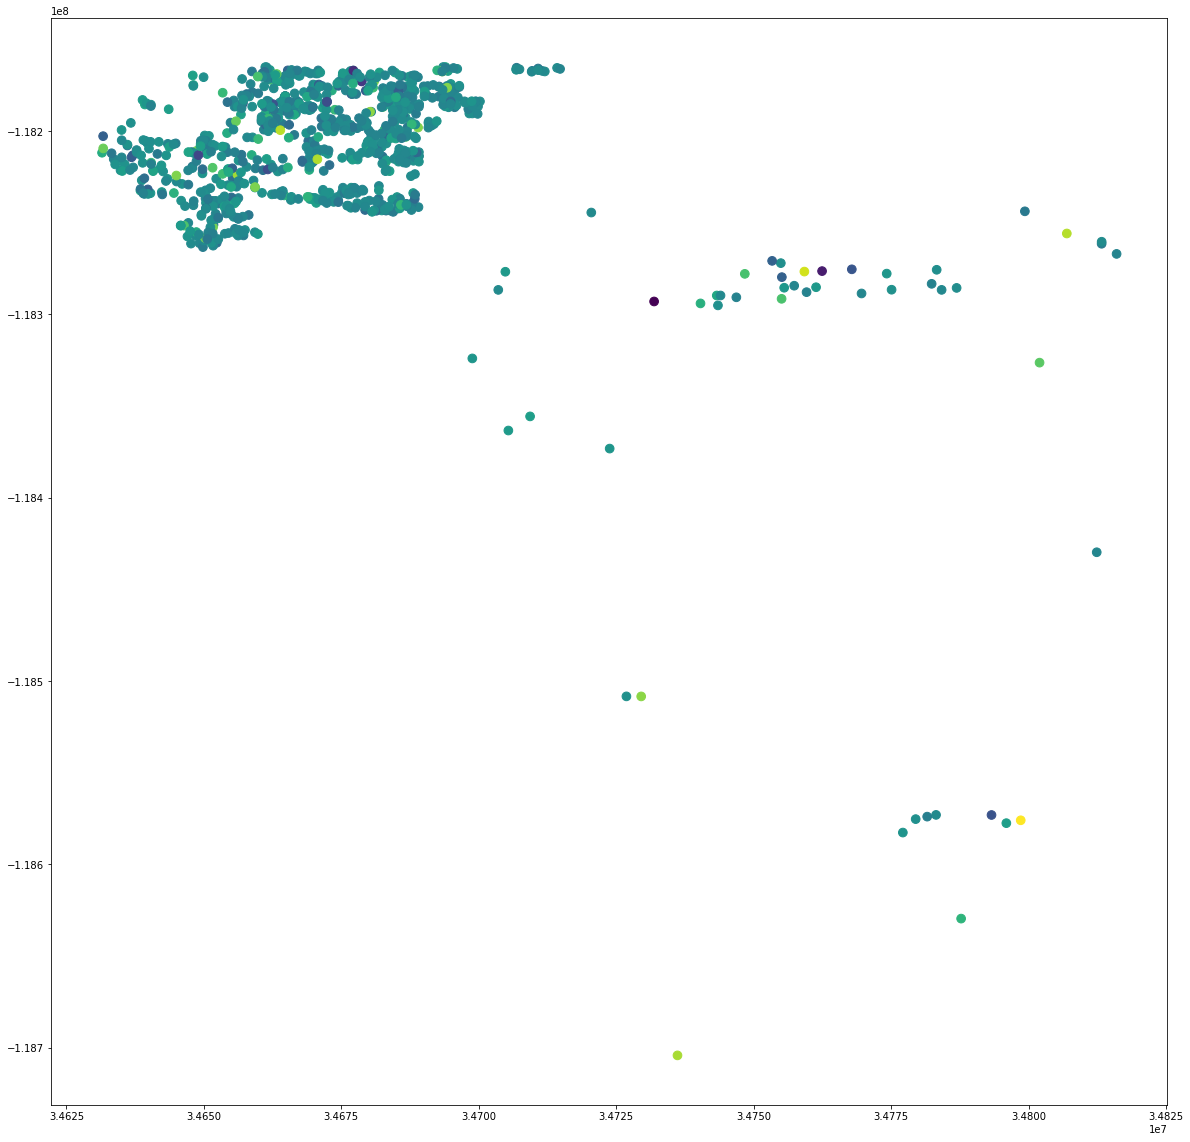

In [47]:
#Map zip code 97319
zip_train16 = train16_geo.loc[(train16_geo['regionidzip']== 97319) & (abs(train16_geo['logerror']) < 0.5)]
plt.figure(figsize=(20,20))
plt.scatter(zip_train16.latitude, zip_train16.longitude, s=75, c = zip_train16.logerror, cmap = 'viridis')

Based on this one zip code, there does not seem to be any identifiable clustering of logerror values.

In [21]:
print(zip_train16['logerror'].describe())

count    912.000000
mean       0.012076
std        0.141581
min       -2.333000
25%       -0.023300
50%        0.004000
75%        0.034400
max        0.851900
Name: logerror, dtype: float64


In [54]:
zip_avg = train16_geo[['regionidzip', 'parcelid', 'latitude', 'longitude', 'logerror']].groupby('regionidzip').agg({'parcelid': 'count', 'latitude': 'mean', 'longitude': 'mean', 'logerror': 'mean'}).sort_values(by = 'logerror', ascending = False)

In [55]:
zip_avg

,parcelid,latitude,longitude,logerror
regionidzip,,,,
96951.0,23,3.363681e+07,-1.178384e+08,0.169213
96039.0,3,3.400076e+07,-1.182410e+08,0.078633
97331.0,19,3.448976e+07,-1.178983e+08,0.076363
96323.0,31,3.414094e+07,-1.182617e+08,0.061419
96034.0,1,3.404900e+07,-1.185280e+08,0.057300
...,...,...,...,...
96467.0,1,3.402074e+07,-1.177482e+08,-0.052300
96002.0,4,3.403600e+07,-1.182330e+08,-0.081200
96500.0,2,3.423917e+07,-1.176603e+08,-0.081300


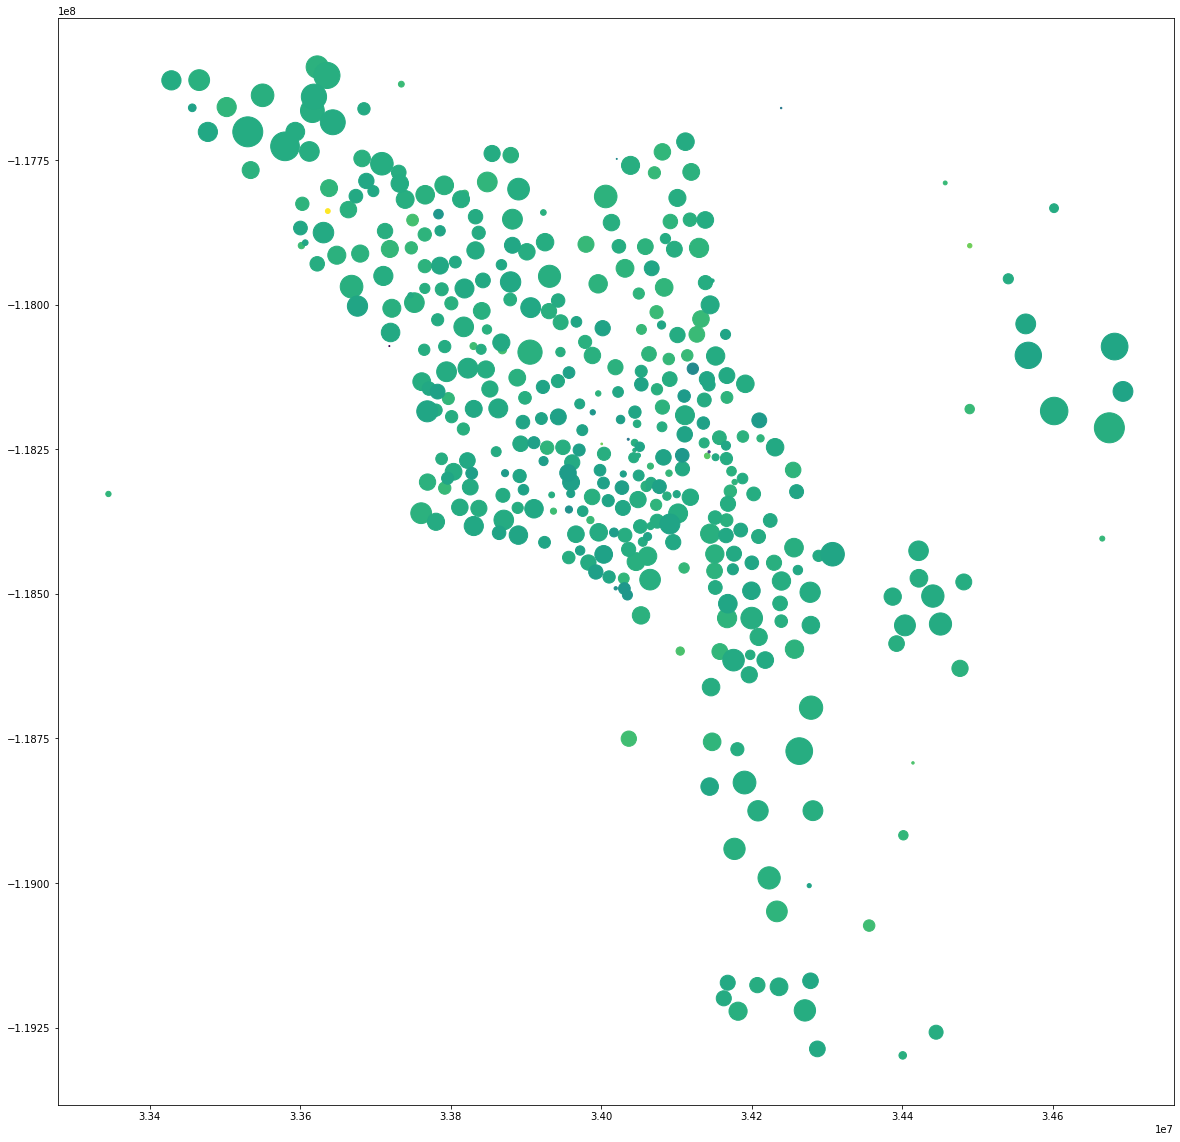

In [56]:
plt.figure(figsize=(20,20))
plt.scatter(zip_avg.latitude, zip_avg.longitude, s=zip_avg.parcelid, c = zip_avg.logerror, cmap = 'viridis')

In [41]:
train16_geo[['regionidzip', 'logerror']].groupby('regionidzip').mean().sort_values(by = 'logerror', ascending = False).describe()

,logerror
count,388.000000
mean,0.006817
std,0.024353
min,-0.252300
25%,0.000010
50%,0.007972
75%,0.014661
max,0.169213


There is not huge variance in the average logerror by zip code once outliers are removed.

<AxesSubplot:>

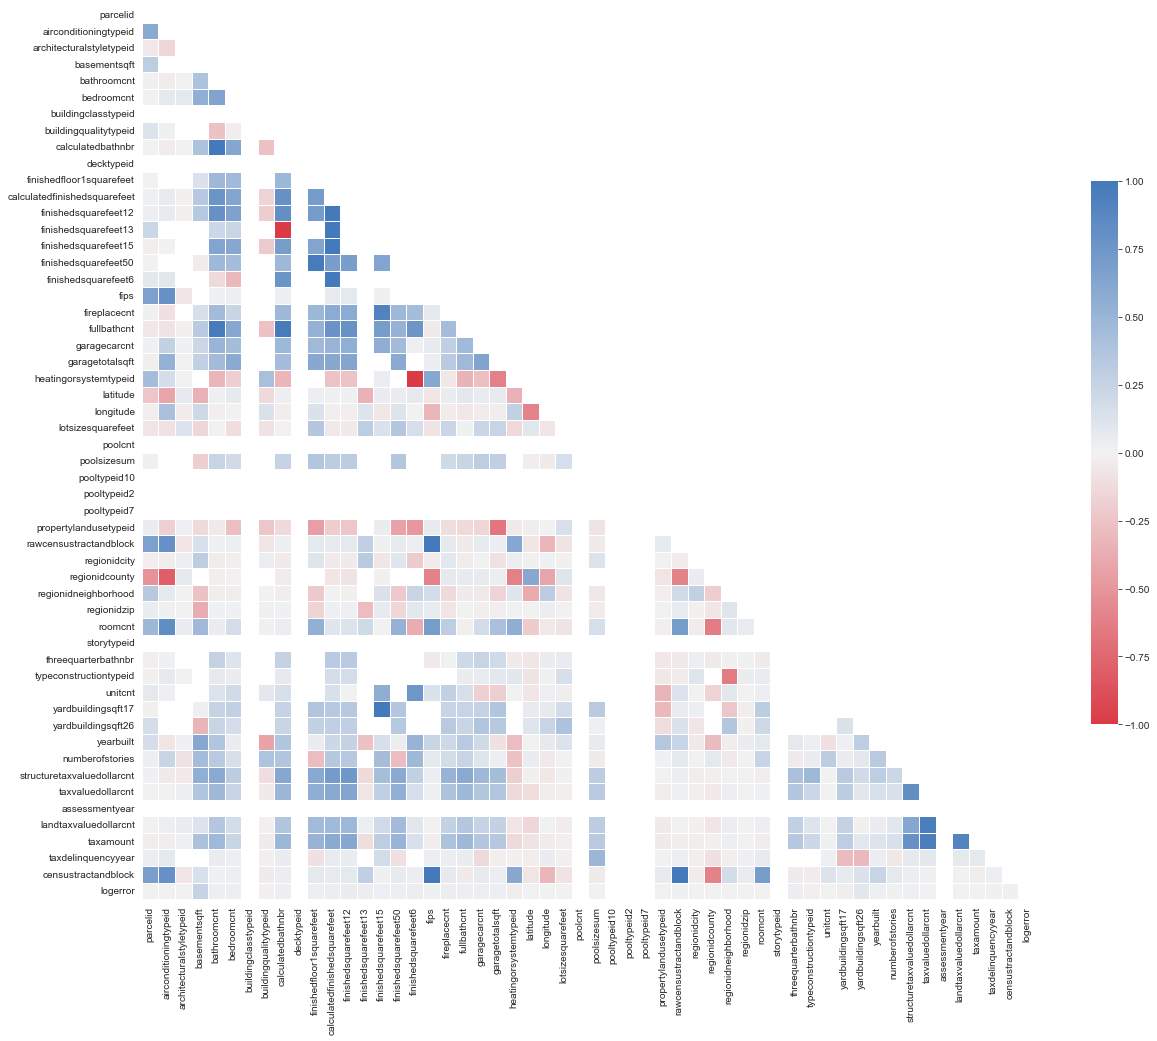

In [4]:
train16_merged = props16.merge(train16, on = 'parcelid', how = 'right')
corr = train16_merged.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [5]:
corr

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
parcelid,1.000000,0.588425,-0.047806,0.294147,-0.014073,0.004971,NaN,0.121008,-0.002608,NaN,-0.004743,0.016994,0.027694,0.221820,-0.022631,-0.005233,0.081681,0.666831,0.008691,-0.060762,0.014834,-0.019875,0.443389,-0.240284,-0.018132,-0.072500,NaN,-0.012003,NaN,NaN,NaN,0.044031,0.666216,-0.018055,-0.515921,0.341805,0.044127,0.485618,NaN,-0.021364,-0.011262,0.074682,-0.008898,0.168313,0.167428,0.029649,0.008460,0.003840,NaN,0.001010,-0.030728,0.033895,0.676362,0.004837
airconditioningtypeid,0.588425,1.000000,-0.154656,NaN,-0.037479,0.075327,NaN,0.008108,-0.034114,NaN,NaN,0.059667,0.060756,NaN,-0.004198,NaN,0.087908,0.801066,-0.094330,-0.085900,0.270857,0.525605,0.166070,-0.417596,0.415025,-0.090773,NaN,NaN,NaN,NaN,NaN,-0.184659,0.800300,-0.028014,-0.801066,0.074884,0.013834,0.831973,NaN,0.010028,0.062502,0.020661,NaN,NaN,-0.074885,0.234819,-0.047324,-0.001102,NaN,0.027169,-0.028251,0.076337,0.797531,0.005179
architecturalstyletypeid,-0.047806,-0.154656,1.000000,NaN,-0.003398,0.071646,NaN,NaN,-0.003398,NaN,NaN,-0.015532,-0.015532,NaN,NaN,NaN,NaN,-0.063370,NaN,-0.011198,0.010195,0.002294,-0.004112,0.069126,-0.031748,0.121985,NaN,NaN,NaN,NaN,NaN,0.018631,-0.063324,0.024850,0.063370,0.004122,-0.006501,0.049794,NaN,NaN,-0.005481,NaN,NaN,NaN,0.009546,-0.086010,-0.047364,0.028603,NaN,0.050978,0.020860,NaN,-0.063332,-0.004276
basementsqft,0.294147,NaN,NaN,1.000000,0.392206,0.554301,NaN,NaN,0.394347,NaN,0.130140,0.341610,0.341610,NaN,NaN,-0.031274,NaN,NaN,0.149221,0.318947,0.225713,0.277500,NaN,-0.344171,0.203418,-0.144900,NaN,-0.191167,NaN,NaN,NaN,-0.129166,0.142869,0.291491,NaN,-0.263337,-0.382571,0.466267,NaN,NaN,NaN,NaN,0.017574,-0.329200,0.610367,0.437536,0.549054,0.372581,NaN,0.123864,0.406130,NaN,0.142869,0.253395
bathroomcnt,-0.014073,-0.037479,-0.003398,0.392206,1.000000,0.646120,NaN,-0.259748,1.000000,NaN,0.477264,0.772553,0.799372,0.212847,0.633631,0.469382,-0.140220,0.009485,0.448016,0.984130,0.502429,0.451062,-0.324459,0.022711,-0.018347,-0.000197,NaN,0.243534,NaN,NaN,NaN,-0.052871,0.009713,-0.037242,-0.022745,-0.029097,0.012265,0.044461,NaN,0.260263,0.066641,0.119038,0.253754,0.234899,0.368061,0.320834,0.586641,0.476363,NaN,0.353806,0.461900,0.046710,0.013078,0.027889
bedroomcnt,0.004971,0.075327,0.071646,0.554301,0.646120,1.000000,NaN,-0.025736,0.618060,NaN,0.458030,0.632035,0.657599,0.230639,0.615172,0.444599,-0.319663,0.023550,0.234765,0.613753,0.432115,0.591496,-0.188627,0.066331,-0.004879,-0.113984,NaN,0.180900,NaN,NaN,NaN,-0.271022,0.024190,-0.022166,-0.002939,-0.024194,0.014874,0.164484,NaN,0.111312,0.041350,0.180838,0.280245,0.169960,0.040871,0.150591,0.305405,0.241329,NaN,0.173205,0.239118,0.023705,0.028170,0.025467
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,0.121008,0.008108,NaN,NaN,-0.259748,-0.025736,NaN,1.000000,-0.259258,NaN,NaN,-0.158691,-0.196411,NaN,-0.212024,NaN,NaN,NaN,NaN,-0.259258,NaN,NaN,0.415216,-0.134659,0.135084,-0.086515,NaN,

In [6]:
corr['logerror'].sort_values(ascending = False)

logerror                        1.000000
basementsqft                    0.253395
yardbuildingsqft26              0.086179
finishedsquarefeet12            0.041922
calculatedfinishedsquarefeet    0.038784
finishedsquarefeet6             0.036847
finishedsquarefeet13            0.034715
threequarterbathnbr             0.034069
fireplacecnt                    0.033235
calculatedbathnbr               0.029448
fullbathcnt                     0.028845
bathroomcnt                     0.027889
garagecarcnt                    0.026531
finishedfloor1squarefeet        0.026242
bedroomcnt                      0.025467
garagetotalsqft                 0.023888
finishedsquarefeet50            0.023619
structuretaxvaluedollarcnt      0.022085
finishedsquarefeet15            0.019327
yearbuilt                       0.017312
numberofstories                 0.013075
censustractandblock             0.008892
rawcensustractandblock          0.008376
fips                            0.008363
taxvaluedollarcn

In [9]:
null_percent(train16_merged)

,feature,null_percentage
0,parcelid,0.0
52,assessmentyear,0.0
40,roomcnt,0.0
37,regionidcounty,0.0
35,rawcensustractandblock,0.0
33,propertylandusetypeid,0.0
58,logerror,0.0
25,longitude,0.0
24,latitude,0.0
17,fips,0.0


In [16]:
# Splitting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(train16_merged.drop(['logerror', 'hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'taxdelinquencyflag', 'fireplaceflag', 'transactiondate'], axis=1), train16_merged['logerror'], test_size=0.20, random_state=0)
# fitting the model
model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
# plotting feature importances
features = data.drop('target', axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [15]:
train16_merged.drop(['logerror', 'hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'taxdelinquencyflag', 'fireplaceflag'], axis=1).dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
latitude                        float64
longitude                       float64


In [16]:
train16['dayofyear'] = train16['transactiondate'].dt.day_of_year

#### 'logerror' values appear not to vary significantly with transaction date

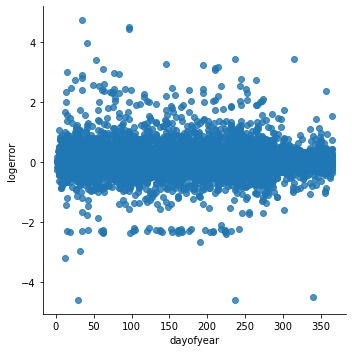

In [18]:
sns.lmplot(x='dayofyear',y='logerror',data=train16,fit_reg=True) 

In [19]:
train16[['logerror', 'dayofyear']].corr()

,logerror,dayofyear
logerror,1.000000,0.006111
dayofyear,0.006111,1.000000
